# NYCDSA Python Project -- Analyzing trends of the oil & gas industry in the global and domestic market

 ### Laurel He

### - Introduction
The motivation for this project is to understand and explore:
1. The global historical oil and gas market trend: who are the major oil and gas producers, exporters and importers? How does oil and gas prices change over the years?
2. The US oil and gas market: what role does it play in the global context and understand the domestic market changes/trends. 
3. Does nominal oil prices affect things like the stock market? Is there any noticeable correlation?

In order to explore each idea, I'm using the following datasets:
1. Understand global market trends: Oil and Gas 1932-2014.csv (Kaggle): it contains information of the global market of 187 countries from 1932 to 2014. There are 41 columns/features that are broken down into several major categories: country, year, oil/gas production, oil/gas price (real/constant: corrected to inflation to 2000 prices, or nominal/no inflation adjustment), oil/gas import/export, and population. Since there are a lot of features, which are often correlated with each other, I will select the most representative factors in each major category to explore. 
2. Understand US specific info from EIA: petroleum-imports.csv, net-petroleum-imports-by-type.csv, petroleum-consumption.csv These datasets breakdown the US imports by country, by type and details the country's consumption, production, import/export from 1950 to 2021.
3. Explore potential relationships between historical nominal crude oil price 1861-2021 (Our World in Data: crude-oil-prices.csv) and the stock market:
    - S&P 500 stock prices 1871 - 2022 (S&P_500.csv) 
    - Dow Jones Industry Average (DJTA) price return (DJIA.csv) to represent the general stock market performance
    - Dow Jones Transportation Average (DJTA) price return to represent the transportation sector stock performance (DJTA.csv).
    
    Explore potential relationships between historical nominal crude oil price 1861-2021 (Our World in Data: crude-oil-prices.csv) and US historical unemployment rate (Bureau of Labor Statistics, BLS: umeployment.csv) and US annual GDP growth rate (GDP_Growth_Rate.csv)

In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1. Understand Global Oil and Gas Market Trends

Load the dataset, simple query to understand the dataset.

In [27]:
df = pd.read_csv('Oil and Gas 1932-2014.csv')
df

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.870000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,...,0.0,0.0,0.0,0.0,12571454.0,NaN,1,0.789705,1.085666,1.374774
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,...,0.0,0.0,0.0,0.0,12754378.0,NaN,1,0.765541,1.052445,1.374774
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,...,0.0,0.0,0.0,0.0,13724317.0,NaN,1,0.750020,1.031107,1.374774
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,...,0.0,NaN,NaN,NaN,14149648.0,NaN,1,0.739192,1.016222,1.374774


In [4]:
df.columns

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

In [15]:
len(df['cty_name'].unique()) # 187 countries

187

Select the most representative features to focus on.

In [740]:
df_new = df[['cty_name', 'year', 'oil_price_2000', 'oil_price_nom', 'gas_price_2000','gas_price_nom', 
             'oil_prod32_14', 'gas_prod55_14', 'net_oil_exports', 'net_gas_exports_bcf', 'population']]

df_new

,cty_name,year,oil_price_2000,oil_price_nom,gas_price_2000,gas_price_nom,oil_prod32_14,gas_prod55_14,net_oil_exports,net_gas_exports_bcf,population
0,Afghanistan,1932,10.860860,0.870000,NaN,0.060000,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1933,8.815239,0.670000,NaN,0.060000,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1934,12.715790,1.000000,NaN,0.060000,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1935,12.039690,0.970000,NaN,0.060000,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1936,13.383210,1.090000,NaN,0.060000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,2010,62.778052,79.495534,3.537880,4.480000,0.0,0.0,0.0,0.0,12571454.0
15517,Zimbabwe,2011,85.170708,111.255598,3.023886,3.950000,0.0,0.0,0.0,0.0,12754378.0
15518,Zimbabwe,2012,83.754465,111.669702,1.995052,2.660000,0.0,0.0,0.0,0.0,13724317.0
15519,Zimbabwe,2013,80.319530,108.658518,2.740400,3.707290,0.0,0.0,NaN,0.0,14149648.0


We plot these features for all 187 countries throughout the years to visualize some general trends (oil price analysis will be in the last section). For instance:
- Saudi Arabia is the largest oil exporter, while the US is the largest oil importer, followed by Japan. Most countries are exporting/importing very little oil.
- Russia is the largest gas exporter, while the US, having been the largest gas importer for about a decade, had imported much less gas, probably thanks to its increased domestic gas production from fracking. 
- Countries with the most population like China and India, especially with their recent rapid population increase, are becoming the second largest and the fourth largest oil importers in more recent years.
- The top oil producers are Russia, Saudi Arabia and the US, while the largest gas producers are Russia and the US.


In [1109]:
country_list = list(df['cty_name'].unique())
def update_line_chart(countries, y_value, yaxis):
    df = pd.read_csv('Oil and Gas 1932-2014.csv')
    mask = df.cty_name.isin(countries)
    fig = px.line(df[mask], 
        x = 'year', y = y_value, color='cty_name')
    fig.update_yaxes(title = yaxis)
    fig.update_xaxes(range = [1984, 2014]) # 1990, 1955, 1984
    return fig

col_list = ['population', 'net_oil_exports', 'net_gas_exports_bcf', 'oil_prod32_14', 'gas_prod55_14']

# update_line_chart(country_list, 'population', 'population')
# update_line_chart(country_list, 'oil_prod32_14', 'oil production (MBTU)')
# update_line_chart(country_list, 'gas_prod55_14', 'gas production (MBcf)') # 1955
# update_line_chart(country_list, 'net_gas_exports_bcf', 'net gas exports (Bcf)') # 1990
update_line_chart(country_list, 'net_oil_exports', 'net oil exports (Btu)') # 1984

We can delve deeper into each feature or category for analysis rather than eyeballing from the very entangled general trend plot. For instance, we can group by category and aggregate values to sums, which yields us the top cumulative oil/gas producers, importers/exporters.

In [595]:
df_sum_exp = df.groupby(['cty_name', 'id'])['net_oil_exports'].sum()
df_sum_exp

cty_name                        id 
Afghanistan                     AFG        0.00000
Albania                         ALB        3.50577
Algeria                         DZA    21904.83056
Angola                          AGO    24957.84828
Argentina                       ARG     3578.58344
                                          ...     
Yemen, Dem. Rep. (South Yemen)  YMD        0.00000
Yemen, Rep.                     YEM     5376.79204
Yugoslavia, Fed. Rep.           YUG        0.00000
Zambia                          ZMB     -299.29210
Zimbabwe                        ZWE        0.00000
Name: net_oil_exports, Length: 182, dtype: float64

In [605]:
df_sum_exp_sorted = df_sum_exp.sort_values(ascending = False)
df_sum_exp_sorted = pd.DataFrame(df_sum_exp_sorted)
df_sum_exp_sorted.to_csv('oil_export.csv')

In [613]:
df_oil_exp = pd.read_csv('oil_export.csv')
df_oil_exp

,cty_name,id,net_oil_exports
0,Saudi Arabia,SAU,164696.89
1,Russian Federation,RUS,78821.60
2,"Iran, Islamic Rep.",IRN,62813.11
3,Norway,NOR,59174.96
4,United Arab Emirates,ARE,53310.15
...,...,...,...
177,Germany,DEU,-47189.37
178,Italy,ITA,-50547.44
179,"Korea, Rep.",KOR,-54640.54
180,Japan,JPN,-121783.95


In [1082]:
# Top 10 oil exporters
fig = px.bar(df_oil_exp.head(10), x = 'cty_name', y = 'net_oil_exports', 
             title = 'Top 10 Oil Exporting Countries (Cumulative: 1984 - 2014)').update_layout(xaxis_title="Country", 
                                            yaxis_title="Cumulative Net Oil Exports (K Barrels / day)")
fig.show()

In [1081]:
# Top 10 oil importers
importers = df_oil_exp.tail(10)
importers['net_oil_imports'] = abs(importers['net_oil_exports'])
fig = px.bar(importers[::-1], x = 'cty_name', y = 'net_oil_imports', 
             title = 'Top 10 Oil Importing Countries (Cumulative: 1990 - 2014)').update_layout(
             xaxis_title="Country", yaxis_title="Cumulative Net Oil Imports (K Barrels / day)")
fig.show()

Bar plots allowed us to visualize the top 10 oil exporting and importing countries. We can use bar plots to again to see the top cumulative oil and gas producers, but it would be nicer to visualize them on the world map. We therefore bringing countries.csv to plot geospatial data with latitude and longitude.

In [1089]:
df5 = pd.read_csv('countries.csv')
df5

,id,latitude,longitude,name
0,AD,42.55,1.60,Andorra
1,ARE,23.42,53.85,United Arab Emirates
2,AFG,33.94,67.71,Afghanistan
3,AG,17.06,-61.80,Antigua and Barbuda
4,AI,18.22,-63.07,Anguilla
...,...,...,...,...
240,YEM,15.55,48.52,Yemen
241,YT,-12.83,45.17,Mayotte
242,ZAF,-30.56,22.94,South Africa
243,ZMB,-13.13,27.85,Zambia


In [1090]:
df_sum_gas = df.groupby(['cty_name', 'id'])['gas_prod55_14'].sum()
df_sum_gas

cty_name                        id 
Afghanistan                     AFG      595.715245
Albania                         ALB       51.847083
Algeria                         DZA    28507.412153
Angola                          AGO     1004.930595
Argentina                       ARG     8738.014735
                                           ...     
Yemen, Dem. Rep. (South Yemen)  YMD        0.000000
Yemen, Rep.                     YEM     7047.958085
Yugoslavia, Fed. Rep.           YUG      307.983668
Zambia                          ZMB        0.000000
Zimbabwe                        ZWE        0.000000
Name: gas_prod55_14, Length: 182, dtype: float64

In [1091]:
df_sum_gas = df_sum_gas.sort_values(ascending = False)

In [1092]:
df_sum_gas = pd.DataFrame(df_sum_gas)
df_sum_gas.to_csv('country_gas_prod.csv')

In [1093]:
df_prod_gas = pd.read_csv('country_gas_prod.csv')
df_prod_gas

,cty_name,id,gas_prod55_14
0,United States,USA,230841.395522
1,Russian Federation,RUS,166099.951904
2,Soviet Union,SUN,75046.012365
3,Canada,CAN,45192.481569
4,Algeria,DZA,28507.412153
...,...,...,...
177,Malawi,MWI,0.000000
178,Maldives,MDV,0.000000
179,Mali,MLI,0.000000
180,Malta,MLT,0.000000


In [1094]:
df_prod_gas.drop(df_prod_gas.tail(75).index, axis = 0, inplace = True)

In [1095]:
df_prod_gas

,cty_name,id,gas_prod55_14
0,United States,USA,230841.395522
1,Russian Federation,RUS,166099.951904
2,Soviet Union,SUN,75046.012365
3,Canada,CAN,45192.481569
4,Algeria,DZA,28507.412153
...,...,...,...
102,Rwanda,RWA,0.187743
103,Chad,TCD,0.131941
104,"Congo, Dem. Rep.",ZAR,0.118745
105,Luxembourg,LUX,0.059375


In [1096]:
# Top gas producers
fig = px.bar(df_prod_gas.head(20), x = 'cty_name', y = 'gas_prod55_14', 
             title = 'Top 20 Gas Producing Countries (Cumulative: 1955 - 2014)').update_layout(
             xaxis_title="Country", yaxis_title="Cumulative Gas Produced (Bcf)")
fig.show()

In [1097]:
df_country_gas = df5.merge(df_prod_gas, on = ['id'], how='inner')
df_country_gas

,id,latitude,longitude,name,cty_name,gas_prod55_14
0,ARE,23.42,53.85,United Arab Emirates,United Arab Emirates,10962.208345
1,AFG,33.94,67.71,Afghanistan,Afghanistan,595.715245
2,ALB,41.15,20.17,Albania,Albania,51.847083
3,AGO,-11.20,17.87,Angola,Angola,1004.930595
4,ARG,-38.42,-63.62,Argentina,Argentina,8738.014735
...,...,...,...,...,...,...
97,UZB,41.38,64.59,Uzbekistan,Uzbekistan,9477.097194
98,VEN,6.42,-66.59,Venezuela,"Venezuela, RB",14266.450619
99,VNM,14.06,108.28,Vietnam,Vietnam,656.269334
100,YEM,15.55,48.52,Yemen,"Yemen, Rep.",7047.958085


In [1098]:
df_sum = df.groupby(['cty_name', 'id'])['oil_prod32_14'].sum()
df_sum

cty_name                        id 
Afghanistan                     AFG    0.000000e+00
Albania                         ALB    5.894998e+07
Algeria                         DZA    2.790063e+09
Angola                          AGO    1.589131e+09
Argentina                       ARG    1.548014e+09
                                           ...     
Yemen, Dem. Rep. (South Yemen)  YMD    0.000000e+00
Yemen, Rep.                     YEM    3.914048e+08
Yugoslavia, Fed. Rep.           YUG    1.005658e+08
Zambia                          ZMB    0.000000e+00
Zimbabwe                        ZWE    0.000000e+00
Name: oil_prod32_14, Length: 182, dtype: float64

In [1099]:
df_sum.sort_values(ascending = False)

cty_name            id 
United States       USA    2.773979e+10
Russian Federation  RUS    2.440140e+10
Saudi Arabia        SAU    1.916382e+10
Soviet Union        SUN    1.467100e+10
Iran, Islamic Rep.  IRN    9.617339e+09
                               ...     
Macedonia, FYR      MKD    0.000000e+00
Madagascar          MDG    0.000000e+00
Malawi              MWI    0.000000e+00
Maldives            MDV    0.000000e+00
Afghanistan         AFG    0.000000e+00
Name: oil_prod32_14, Length: 182, dtype: float64

In [1100]:
df_sum = pd.DataFrame(df_sum)
df_sum.to_csv('country_prod.csv')

In [1101]:
df_prod = pd.read_csv('country_prod.csv')
df_prod

,cty_name,id,oil_prod32_14
0,Afghanistan,AFG,0.000000e+00
1,Albania,ALB,5.894998e+07
2,Algeria,DZA,2.790063e+09
3,Angola,AGO,1.589131e+09
4,Argentina,ARG,1.548014e+09
...,...,...,...
177,"Yemen, Dem. Rep. (South Yemen)",YMD,0.000000e+00
178,"Yemen, Rep.",YEM,3.914048e+08
179,"Yugoslavia, Fed. Rep.",YUG,1.005658e+08
180,Zambia,ZMB,0.000000e+00


In [1102]:
df_prod = df_prod.sort_values('oil_prod32_14', ascending = False)
df_prod.drop(df_prod.tail(73).index, axis = 0, inplace = True)

In [1103]:
# Top oil producers
fig = px.bar(df_prod.head(30), x = 'cty_name', y = 'oil_prod32_14', 
             title = 'Top 20 Oil Producing Countries (Cumulative: 1932 - 2014)').update_layout(
             xaxis_title="Country", yaxis_title="Cumulative Oil Produced (K Barrels / day)")
fig.show()

In [1104]:
df_country = df5.merge(df_prod, on = ['id'], how='inner')
df_country

,id,latitude,longitude,name,cty_name,oil_prod32_14
0,ARE,23.42,53.85,United Arab Emirates,United Arab Emirates,4.533734e+09
1,ALB,41.15,20.17,Albania,Albania,5.894998e+07
2,AGO,-11.20,17.87,Angola,Angola,1.589131e+09
3,ARG,-38.42,-63.62,Argentina,Argentina,1.548014e+09
4,AUT,47.52,14.55,Austria,Austria,1.181782e+08
...,...,...,...,...,...,...
98,UZB,41.38,64.59,Uzbekistan,Uzbekistan,1.245021e+08
99,VEN,6.42,-66.59,Venezuela,"Venezuela, RB",9.180203e+09
100,VNM,14.06,108.28,Vietnam,Vietnam,3.316304e+08
101,YEM,15.55,48.52,Yemen,"Yemen, Rep.",3.914048e+08


In [1106]:
# Geospatial plotting for better visualization
fig = px.scatter_geo(df_country, lat = 'latitude', lon = 'longitude', color = 'name',
                     hover_name = 'oil_prod32_14', size = 'oil_prod32_14',
                     projection = "natural earth")
fig.update_layout(title = 'Global mapping of cumulative oil production from 1932 to 2014 by country')
fig.show()

In [1107]:
fig = px.scatter_geo(df_country_gas, lat = 'latitude', lon = 'longitude', color = 'name',
                     hover_name = 'gas_prod55_14', size = 'gas_prod55_14',
                     projection = "natural earth")
fig.update_layout(title = 'Global mapping of cumulative gas production from 1955 to 2014 by country')
fig.show()

### 2. US Domestic oil and gas market
Having had a general impression on the global oil and gas market trends, we now focus on the US oil and gas market. We saw that the US was the top oil importer up until 2014, and the top gas importer for a period of time (around 1995 - 2007). We know that because of the fracking revolution (implemented since 1947), the US had more than 1.7 million US wells completed using the fracking process, producing more than seven billion barrels of oil and 600 trillion cubic feet of natural gas. Yet, we haven't seen this benefit show up on the US' oil exporter/importer ranking plot. We therefore bringing more recent updated datasets to help us analyze.

In [723]:
# US consumption, production, imports, exports, and net imports
df_domestic = pd.read_csv('petroleum-consumption.csv')
df_domestic

,year,consumption,production,imports,exports,net imports
0,1950,6.458,5.908,0.850,0.305,0.545
1,1951,7.016,6.726,0.844,0.422,0.422
2,1952,7.270,6.874,0.952,0.432,0.520
3,1953,7.600,7.131,1.034,0.402,0.633
4,1954,7.756,7.056,1.052,0.355,0.696
...,...,...,...,...,...,...
67,2017,19.958,15.443,10.144,6.376,3.768
68,2018,20.504,17.732,9.943,7.601,2.341
69,2019,20.543,19.266,9.141,8.471,0.670
70,2020,18.120,18.400,7.857,8.508,-0.651


In [739]:
fig = px.line(df_domestic, x = 'year', y = df_domestic.columns[1:], 
              title = 'US Petroleum Consumption, Production, Exports, Imports, Net Imports 1950 - 2021').update_layout(
              xaxis_title="Year", yaxis_title="Million Barrels / day")
fig.show()

We see that continuing from 2014, US oil net imports had continuously gone down, while production and exports gone up.

In [727]:
df_us_import = pd.read_csv('petroleum-imports.csv')
df_us_import

,year,total,OPEC,Persian Gulf,Canada,Mexico
0,1960,1.815,1.233,0.326,0.120,0.084
1,1961,1.917,1.224,0.346,0.190,0.073
2,1962,2.082,1.265,0.272,0.250,0.074
3,1963,2.123,1.282,0.303,0.265,0.108
4,1964,2.259,1.352,0.318,0.299,0.131
...,...,...,...,...,...,...
57,2017,10.144,3.366,1.746,4.054,0.955
58,2018,9.943,2.888,1.578,4.292,0.901
59,2019,9.141,1.639,0.963,4.432,0.530
60,2020,7.863,0.886,0.766,4.125,0.522


In [737]:
fig = px.line(df_us_import, x = 'year', y = df_us_import.columns[1:], 
              title = 'US Petroleum Import 1960 - 2021').update_layout(xaxis_title="Year", 
                                                                       yaxis_title="Million Barrels / day")
fig.show()

We see that the US gets its petroelum import mostly from Canada, OPEC countries, Persian Gulf countries and Mexico. In more recent years, likely because of politics,  energy secruity issues, increased domestic oil and gas production, the US is relying more on Canada and much less on the OPEC countries, while keeping total imports down.

In [732]:
df_import_type = pd.read_csv('net-petroleum-imports-by-type.csv')
df_import_type

,year,crude oil,refined products and other,hydrocarbon gas liquids
0,1960,1.01,0.61,0.00
1,1961,1.04,0.71,0.00
2,1962,1.12,0.80,0.00
3,1963,1.13,0.79,-0.01
4,1964,1.19,0.87,0.00
...,...,...,...,...
57,2017,6.81,-1.83,-1.21
58,2018,5.72,-1.97,-1.40
59,2019,3.82,-1.53,-1.62
60,2020,2.67,-1.38,-1.92


In [738]:
fig = px.bar(df_import_type, x = 'year', y = df_import_type.columns[1:],
            title = 'US Petroleum Import Breakdown by Type 1960 - 2021').update_layout(
            xaxis_title="Year", yaxis_title="Million Barrels / day")
fig.show()

We see that the US petroleum imports is mostly crude oil. Since 2011, the US had only been importing crude oil (albeit less and less), while able to export refined petroleum products and hydrocarbon gas liquids. Back in the 60s and 70s, refined products constituted around half of US' petroleum imports. This probably signals that the US oil and gas production and refining had matured, and is efficient enough to satisfy the majority of domestic oil and gas demands. In fact, by 2015, the United States had become the 3rd largest producer of oil, moving from importer to exporter. The significant dip in imports from 2019 - 2021 is probably due to much less demand for petroleum during the Covid pandemic.


### 3. Crude oil price trends


We now want to focus on crude oil price trends. Oil prices are determined by global supply and demand, while all countries share the same global crude oil price. Real prices are inflation adjusted, while nominal prices are current prices that are not inflation adjusted. In comparing oil prices to other factors I'm exploring, I'm using nominal crude oil prices and other non-inflation adjusted factors to keep the comparison consistent. 

#### 3.1. World crude oil price history


In [1115]:
df2 = pd.read_csv('crude-oil-prices.csv')
df2['Crude Oil Prices $/bbl'] = df2['Crude Oil Prices']/6.28981
df2

,Entity,Code,Year,Crude Oil Prices,Crude Oil Prices $/bbl
0,World,OWID_WRL,1861,3.081610,0.489937
1,World,OWID_WRL,1862,6.603450,1.049865
2,World,OWID_WRL,1863,19.810351,3.149594
3,World,OWID_WRL,1864,50.689343,8.058962
4,World,OWID_WRL,1865,41.444511,6.589151
...,...,...,...,...,...
156,World,OWID_WRL,2017,340.816255,54.185461
157,World,OWID_WRL,2018,448.468958,71.300875
158,World,OWID_WRL,2019,403.820283,64.202302
159,World,OWID_WRL,2020,263.121349,41.832957


In [1126]:
fig = px.line(df2, x = 'Year', y = 'Crude Oil Prices $/bbl', title = 'World Crude Oil Prices 1861 - 2021').update_layout( 
                                                                yaxis_title="Nominal Crude Oil Price USD / Barrel")
fig.add_annotation(x=1920, y = 1.6,
            text="Before 1973: TRC & Super Majors",
            showarrow=True,
            arrowhead=2)
fig.add_annotation(x=1973, y = 3.3,
            text="1973 Oil Embargo",
            showarrow=True,
            arrowhead=2)
fig.add_annotation(x=1978, y = 14.5,
            text="1978 Iranian Revolution",
            showarrow=True,
            arrowhead=2)
fig.add_annotation(x=1981, y = 36,
            text="1981 Start of Decline",
            showarrow=True,
            arrowhead=2)
# fig.add_annotation(x=1986, y = 14.43,
#             text="1986 Saudi Netback Pricing",
#             showarrow=True,
#             arrowhead=2)
# fig.add_annotation(x=1988, y = 14.92384,
#             text="1988 OPEC pricing regime replaced by commodity market pricing",
#             showarrow=True,
#             arrowhead=2)
fig.add_annotation(x=1990, y = 24,
            text="1990 Gulf War",
            showarrow=True,
            arrowhead=2)
fig.add_annotation(x=2008, y = 97,
            text="2008 Financial Crisis",
            showarrow=True,
            arrowhead=2)
# fig.add_annotation(x=2011, y = 85,
#             text="2011 Libyan civil war",
#             showarrow=True,
#             arrowhead=2)
# fig.add_annotation(x=2012, y = 84,
#             text="2012 Supply outages in Iran, Nigeria, Sudan, Yemen",
#             showarrow=True,
#             arrowhead=2)
fig.update_layout()
fig.show()

From the historical oil price trend, we can see that major historical events leave significant impact on the oil prices. For instance, before 1973, world oil prices were managed by the Texas Railroad Commission (TRC) and a handful of large oil companies (super-majors). They had access to resources in host countries and costs were reasonable, stable and non-competitive given the ample supply. By 1973, OPEC countries ended the super-majors' control of world oil prices and gained control to vast oil resources themselves. The rapid price hikes in the 70s were associated with the 1973 Oil Embargo, the 1978 Iranian Revolution, but high oil prices like these also stimulated new supplies and stymied demand. Therefore, oil prices began to decline by 1981. Saudi Arabia tried to maintain higher prices by cutting production and in 1986 adopted netback pricing to regain market share to no avail. By 1988, the OPEC pricing regime was replaced by commodity market pricing, which is the system used today. The new pricing regime produced relatively stable, inflation adjusted, oil prices until 1999 (except for the sharp increase in 1990 due to the Gulf War). However, starting from 1999, oil prices began a sharp upward trend. With record high prices, US demand slackened and precipitated in the world-wide banking crisis of 2008. The 2011 Libyan civil war caused another price peak, and another one in 2012 caused by the increased supply outages in Iran, Nigeria, Sudan and Yemen. After 2012, the significant price slide was due to a deteriorating economic outlook in the Eurozone and the uncertainty of whether the EU and the European Central Bank would take the necessary actions to prevent an unraveling of the euro. Starting from 2018, signs of global economic slowdown appeared, which could be caused by the trade war between the US and China. And the dip in oil price in 2020 was due to the Covid pandemic. 

#### 3.2  Crude Oil Prices vs. Stock Market
We want to explore potential relationships between the nominal oil price, the general stock market (S&P 500), transportation specific Dow Jones Transportation Index (DJTI) price returns, and I'm also plotting Dow Jones Industry Index (DJTI) price returns for comparison.

In [985]:
df3 = pd.read_csv('S&P_500.csv')
df3

,Date,S&P 500 Price
0,1-Jan-22,4573.82
1,1-Jan-21,3793.75
2,1-Jan-20,3278.20
3,1-Jan-19,2607.39
4,1-Jan-18,2789.80
...,...,...
147,"Jan 1, 1875",4.54
148,"Jan 1, 1874",4.66
149,"Jan 1, 1873",5.11
150,"Jan 1, 1872",4.86


In [907]:
df4 = pd.read_csv('DJTA.csv')
df4

,Year,DJTA Closing value
0,1924,98.33
1,1925,112.93
2,1926,120.86
3,1927,140.30
4,1928,151.14
...,...,...
93,2017,10612.29
94,2018,9170.40
95,2019,10901.28
96,2020,12506.93


In [909]:
df5 = pd.read_csv('DJIA.csv')
df5

,Year,DJIA Closing Price
0,2022,32777.95
1,2021,34055.29
2,2020,26890.67
3,2019,26379.55
4,2018,25046.86
...,...,...
103,1919,99.79
104,1918,80.97
105,1917,87.87
106,1916,95.27


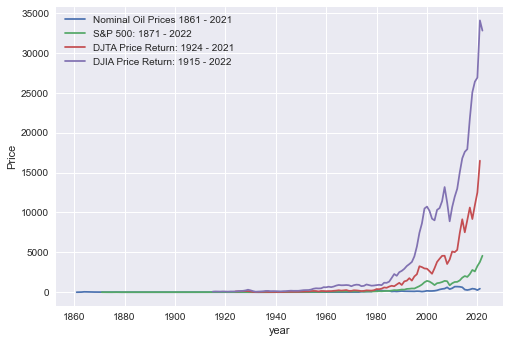

In [986]:
y2 = df2['Crude Oil Prices']
df3.index = df3.index.values[::-1]
y3_temp = df3['S&P 500 Price'].iloc[::-1]
y3 = y3_temp.copy()
y4 = df4['DJTA Closing value']
df5.index = df5.index.values[::-1]
y5_temp = df5['DJIA Closing Price'].iloc[::-1]
y5 = y5_temp
plt.plot(df2['Year'], y2, label = 'Nominal Oil Prices 1861 - 2021')
plt.plot(np.arange(1871, 2023), y3, label = 'S&P 500: 1871 - 2022')
plt.plot(df4['Year'], y4, label = 'DJTA Price Return: 1924 - 2021')
plt.plot(np.arange(1915, 2023), y5, label = 'DJIA Price Return: 1915 - 2022')
plt.xlabel('year')
plt.ylabel('Price')
plt.legend()
plt.show()

Since the oil prices and the stock prices have different scales, we standardize the above datasets to make the more comparable, while the data trends are preserved. 

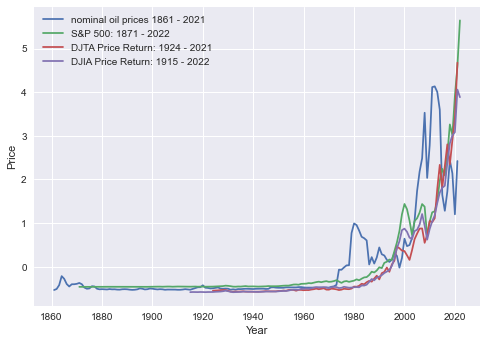

In [987]:
# standardize to make the trends more comparable
def standardize(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

y2_std = standardize(y2)
y3_std = standardize(y3)
y4_std = standardize(y4)
y5_std = standardize(y5)

plt.plot(df2['Year'], y2_std, label = 'nominal oil prices 1861 - 2021')
plt.plot(np.arange(1871, 2023), y3_std, label = 'S&P 500: 1871 - 2022')
plt.plot(df4['Year'], y4_std, label = 'DJTA Price Return: 1924 - 2021')
plt.plot(np.arange(1915, 2023), y5_std, label = 'DJIA Price Return: 1915 - 2022')

plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

We can cut off the flat tail before 1970 to better see the trend variations in more recent years. We can see the stock prices follow roughly an exponential shape since they are not inflation adjusted. The oil prices are much more variable and have a slower rising trend. We want to see if they have any correlations and visualize the results in heatmaps.

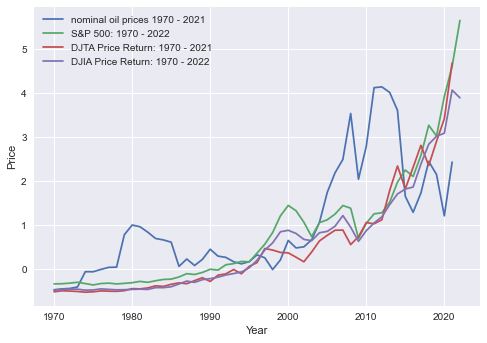

In [988]:
# zoom in to after 1970
plt.plot(np.arange(1970, 2022), y2_std.tail(52), label = 'nominal oil prices 1970 - 2021')
plt.plot(np.arange(1970, 2023), y3_std.tail(53), label = 'S&P 500: 1970 - 2022')
plt.plot(np.arange(1970, 2022), y4_std.tail(52), label = 'DJTA Price Return: 1970 - 2021')
plt.plot(np.arange(1970, 2023), y5_std.tail(53), label = 'DJIA Price Return: 1970 - 2022')

plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [990]:
df3['Year'] = np.flip(np.arange(1871, 2023))
df3

,Date,S&P 500 Price,Year
151,1-Jan-22,4573.82,2022
150,1-Jan-21,3793.75,2021
149,1-Jan-20,3278.20,2020
148,1-Jan-19,2607.39,2019
147,1-Jan-18,2789.80,2018
...,...,...,...
4,"Jan 1, 1875",4.54,1875
3,"Jan 1, 1874",4.66,1874
2,"Jan 1, 1873",5.11,1873
1,"Jan 1, 1872",4.86,1872


In [991]:
df_combined = df5.merge(df4, on = 'Year', how='inner').merge(df2, on = 'Year', how='inner').merge(
    df3, on = 'Year', how='inner')
df_combined.iloc[::-1]

,Year,DJIA Closing Price,DJTA Closing value,Entity,Code,Crude Oil Prices,Date,S&P 500 Price
97,1924,99.65,98.33,World,OWID_WRL,8.993270,1-Jan-24,8.83
96,1925,134.40,112.93,World,OWID_WRL,10.565520,1-Jan-25,10.58
95,1926,153.00,120.86,World,OWID_WRL,11.823320,1-Jan-26,12.65
94,1927,176.07,140.30,World,OWID_WRL,8.175700,1-Jan-27,13.40
93,1928,226.17,151.14,World,OWID_WRL,7.358130,1-Jan-28,17.53
...,...,...,...,...,...,...,...,...
4,2017,21750.20,10612.29,World,OWID_WRL,340.816255,1-Jan-17,2275.12
3,2018,25046.86,9170.40,World,OWID_WRL,448.468958,1-Jan-18,2789.80
2,2019,26379.55,10901.28,World,OWID_WRL,403.820283,1-Jan-19,2607.39
1,2020,26890.67,12506.93,World,OWID_WRL,263.121349,1-Jan-20,3278.20


In [992]:
df_combined.corr(method='kendall')

,Year,DJIA Closing Price,DJTA Closing value,Crude Oil Prices,S&P 500 Price
Year,1.000000,0.894803,0.842205,0.758220,0.893541
DJIA Closing Price,0.894803,1.000000,0.891016,0.741705,0.948243
DJTA Closing value,0.842205,0.891016,1.000000,0.735353,0.862823
Crude Oil Prices,0.758220,0.741705,0.735353,1.000000,0.734506
S&P 500 Price,0.893541,0.948243,0.862823,0.734506,1.000000


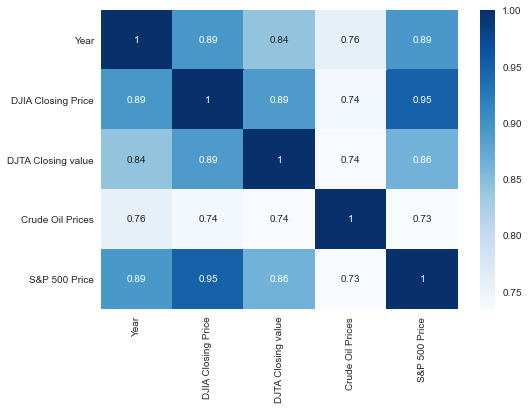

In [993]:
corr1 = df_combined.corr(method='kendall')
sns.heatmap(corr1, cmap="Blues", annot=True)

In [994]:
df_combined.tail(52).corr(method='kendall')

,Year,DJIA Closing Price,DJTA Closing value,Crude Oil Prices,S&P 500 Price
Year,1.000000,0.736048,0.511312,0.535637,0.731523
DJIA Closing Price,0.736048,1.000000,0.730015,0.560335,0.904977
DJTA Closing value,0.511312,0.730015,1.000000,0.497047,0.656109
Crude Oil Prices,0.535637,0.560335,0.497047,1.000000,0.531006
S&P 500 Price,0.731523,0.904977,0.656109,0.531006,1.000000


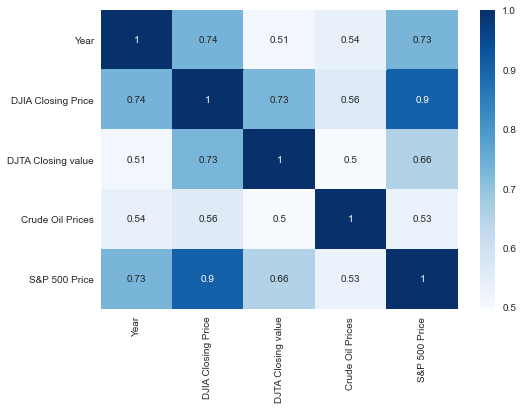

In [1127]:
corr_tail = df_combined.tail(52).corr(method='kendall')
sns.heatmap(corr_tail, cmap="Blues", annot=True)

From the correlation heat maps, we can see that indeed among the stock prices themselves, they share high correlation (0.9ish), while the stock prices and the oil prices have less correlation (0.7is) but still quite high. After focusing on 1970-2021, we see the correlation decreased across the board since the similar tails across the prices were cut and left with more variable profiles. It seems like DJIA and S&P 500 are highly correlated still (0.9), followed by DJTA and DJIA (0.73), DJTA and S&P 500 (0.66), DJIA & oil price (0.56), S&P 500 & oil price (0.53), DJTA & oil price (0.5). This is saying that the stock prices themselves still have strong correlation, but oil prices are slightly more correlated than general stock prices than the transportation sector specific stock, which is quite surprising as oil is much more used in the transportation sector than industrial or any other sectors. It could be because the Kendall correlation coefficient couldn't capture the relationships between these nonlinear, non-monotonic curves, especially the oil price curve. We would require more sophisticated methods to describe correlation. 

#### 3.3 Crude Oil Prices vs. US unemployment rate and GDP growth rate
To complete the analysis, we explore the relationship between nominal crude oil prices and the US unemployment rate and GDP growth rate throughout the years.

In [997]:
df_unemploy = pd.read_csv('unemployment.csv')
df_unemploy['Unemployment Rate'] = df_unemploy['Unemployment rate']/100
df_unemploy

,Year,Unemployment rate,Unemployment Rate
0,1948,3.75,0.0375
1,1949,6.05,0.0605
2,1950,5.21,0.0521
3,1951,3.28,0.0328
4,1952,3.03,0.0303
...,...,...,...
70,2018,3.89,0.0389
71,2019,3.68,0.0368
72,2020,8.09,0.0809
73,2021,5.36,0.0536


In [966]:
df_GDP = pd.read_csv('GDP_Growth_Rate.csv')
df_GDP['Year'] = np.flip(np.arange(1930, 2023))
df_GDP

,Date,US GDP Growth Rate,Year
0,30-Sep-22,0.09,2022
1,31-Dec-21,0.12,2021
2,31-Dec-20,0.00,2020
3,31-Dec-19,0.04,2019
4,31-Dec-18,0.05,2018
...,...,...,...
88,31-Dec-34,0.17,1934
89,31-Dec-33,-0.04,1933
90,31-Dec-32,-0.23,1932
91,31-Dec-31,-0.16,1931


Again, we standardize to make these features comparable. Combining the datasets (inner join) will only keep the years where we have all three datasets (1948 - 2021).

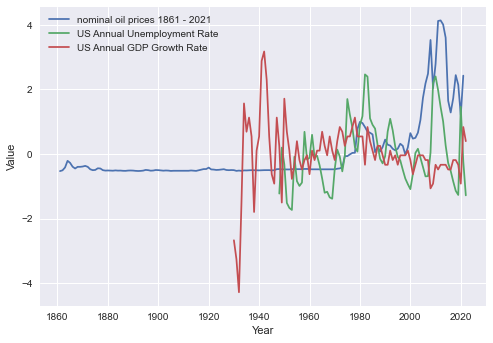

In [998]:
plt.plot(df2['Year'], y2_std, label = 'nominal oil prices 1861 - 2021')
y_unemploy = standardize(df_unemploy['Unemployment Rate'])
plt.plot(df_unemploy['Year'], y_unemploy, label = 'US Annual Unemployment Rate')
y_GDP = standardize(df_GDP['US GDP Growth Rate'])
plt.plot(df_GDP['Year'], y_GDP, label = 'US Annual GDP Growth Rate')

plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [1001]:
df_unemploy = df_unemploy.drop(['Unemployment rate'], axis=1)
df_combined2 = df_GDP.merge(df_unemploy, on = 'Year', how='inner').merge(df2, on = 'Year', how='inner')
df_combined2.iloc[::-1]

,Date,US GDP Growth Rate,Year,Unemployment Rate,Entity,Code,Crude Oil Prices
73,31-Dec-48,0.08,1948,0.0375,World,OWID_WRL,12.515110
72,31-Dec-49,-0.04,1949,0.0605,World,OWID_WRL,11.194420
71,31-Dec-50,0.18,1950,0.0521,World,OWID_WRL,10.754190
70,31-Dec-51,0.11,1951,0.0328,World,OWID_WRL,10.754190
69,31-Dec-52,0.07,1952,0.0303,World,OWID_WRL,10.754190
...,...,...,...,...,...,...,...
4,31-Dec-17,0.05,2017,0.0436,World,OWID_WRL,340.816255
3,31-Dec-18,0.05,2018,0.0389,World,OWID_WRL,448.468958
2,31-Dec-19,0.04,2019,0.0368,World,OWID_WRL,403.820283
1,31-Dec-20,0.00,2020,0.0809,World,OWID_WRL,263.121349


In [1002]:
df_combined2.corr(method='kendall')

,US GDP Growth Rate,Year,Unemployment Rate,Crude Oil Prices
US GDP Growth Rate,1.000000,-0.282841,-0.032133,-0.248675
Year,-0.282841,1.000000,0.140026,0.702246
Unemployment Rate,-0.032133,0.140026,1.000000,0.274017
Crude Oil Prices,-0.248675,0.702246,0.274017,1.000000


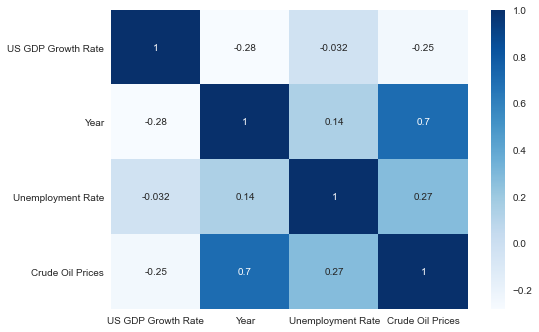

In [1003]:
corr2 = df_combined2.corr(method='kendall')
sns.heatmap(corr2, cmap="Blues", annot=True)

These datasets are much noisy than comparing prices, especially with GDP growth rate being a dynamic feature (decreasing and increasing, both positive and negative values). Almost none of them have discernable correlations. We might need another way of looking at their relationships.

In [1071]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x = df_combined2['Year'].head(49), y = df_combined2['Crude Oil Prices'].head(49), 
               name="Nominal Oil Price"), secondary_y=False,
)

fig.add_trace(
    go.Bar(x = df_combined2['Year'].head(49), y = df_combined2['Unemployment Rate'].head(49), 
           name="Unemployment Rate"), secondary_y=True,
    )
fig.add_trace(
    go.Bar(x = df_combined2['Year'].head(49), y = df_combined2['US GDP Growth Rate'].head(49), 
           name="US GDP Growth Rate"), secondary_y=True,
    )
fig.update_yaxes(range=[0, 0.3],
                 secondary_y=True)
fig.update_traces(opacity = 0.6,
                  selector=dict(type="bar"))
fig.update_layout(barmode='stack', xaxis_title="Year", yaxis_title="USD / Barrel", 
                 title = 'World Crude Oil Nominal Price vs. GDP Growth Rate and Unemployment Rate 1973 - 2021')
fig.add_annotation(x=2008, y = 120,
            text="2008 Financial Crisis",
            showarrow=True,
            arrowhead=2)
fig.add_annotation(x=2020, y = 185,
            text="2020 Covid Pandemic",
            showarrow=True,
            arrowhead=2)
fig.show()

We are plotting the same information as before, but the rates on bar plots. A general pattern that we can see is that each oil price spike is followed by a drop in GDP growth rate and an increased unemployment rate. Rapidly increasing oil prices reduce automobile sales, reduced household income after paying unavoidable fuel expenses, and less driving. With reduced spending, an economic slowdown could result. For instance, with the exponentially increasing oil prices leading up to 2008, disposable income was greatly strained, and employment and mortgage defaults contributed to the worst world-wide economic contraction in 75 years. More sophisticated analysis is needed to fully understand the relationship between oil price, unemployment, and GDP growth, but no doubt they are very much correlated if not causal.